In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

30.4


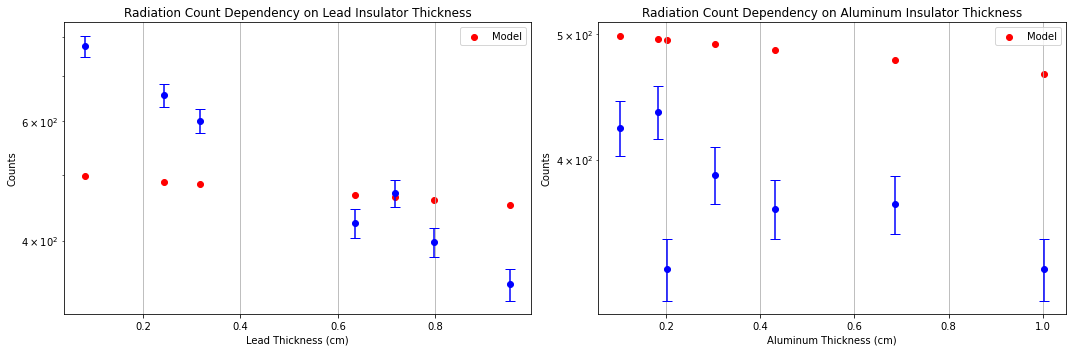

In [46]:
background_df = pd.read_csv('data/background30s.tsv',delimiter='\t')
cs137_pb_df = pd.read_csv('data/cs-137-Pb.tsv',delimiter='\t')
cs137_al_df = pd.read_csv('data/cs-137-Al.tsv',delimiter='\t')


    

background = background_df['Counts'].mean()


pb_counts = cs137_pb_df['Counts'] - background
al_counts = cs137_al_df['Counts'] - background
pb_thicknesses = np.array([0.375,0.250,0.314,0.096,0.032,0.282,0.125])*2.54
al_thicknesses = np.array([0.395,0.270,0.170,0.080,0.120,0.040,0.072])*2.54

print(background)
#print(al_counts)
N_0 = 533 - background


fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

# lead
murho_lead = 0.1137
pb_model = (N_0)*np.exp(-murho_lead * pb_thicknesses)
ax1.errorbar(pb_thicknesses,pb_counts,yerr=np.sqrt(pb_counts),fmt='o',capsize=5,c='b')
ax1.scatter(pb_thicknesses,pb_model,c='red',label='Model')



ax1.set_yscale('log')
ax1.grid()
ax1.set_ylabel('Counts')
ax1.set_title('Radiation Count Dependency on Lead Insulator Thickness')
ax1.set_xlabel('Lead Thickness (cm)')

# aluminum


murho_aluminum = 0.0750
al_model = (N_0)*np.exp(-murho_aluminum * al_thicknesses)

ax2.errorbar(al_thicknesses,al_counts,yerr=np.sqrt(al_counts),fmt='o',capsize=5,c='b')
ax2.scatter(al_thicknesses,al_model,c='red',label='Model')
ax2.set_yscale('log')
ax2.grid()
ax2.set_ylabel('Counts')
ax2.set_title('Radiation Count Dependency on Aluminum Insulator Thickness')
ax2.set_xlabel('Aluminum Thickness (cm)')


# MODEL








ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

